In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [161]:
df = pd.read_csv('data.csv').replace('-', np.NaN).astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   t       2000 non-null   float64
 1   x       819 non-null    float64
 2   y       827 non-null    float64
dtypes: float64(3)
memory usage: 47.0 KB


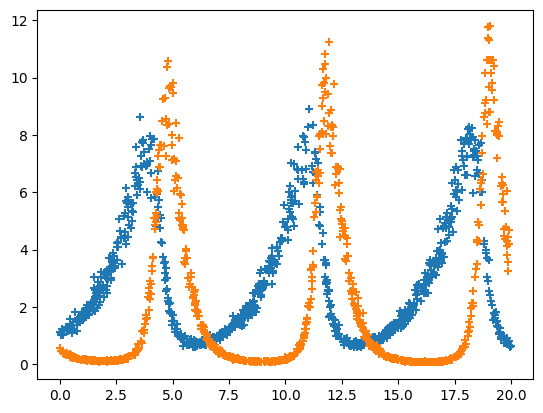

In [162]:
plt.scatter(x=df.t, y=df.x, marker='+')
plt.scatter(x=df.t, y=df.y, marker='+')
plt.show()

In [163]:
df_filled = df.interpolate(limit_direction='both')
df_filled

,t,x,y
0,0.00,1.115912,0.575905
1,0.01,1.115912,0.551311
2,0.02,1.115912,0.526716
3,0.03,1.060697,0.502121
4,0.04,1.005483,0.477527
...,...,...,...
1995,19.95,0.611707,4.186361
1996,19.96,0.615469,4.186361
1997,19.97,0.619231,4.186361
1998,19.98,0.622993,4.186361


<AxesSubplot:xlabel='t'>

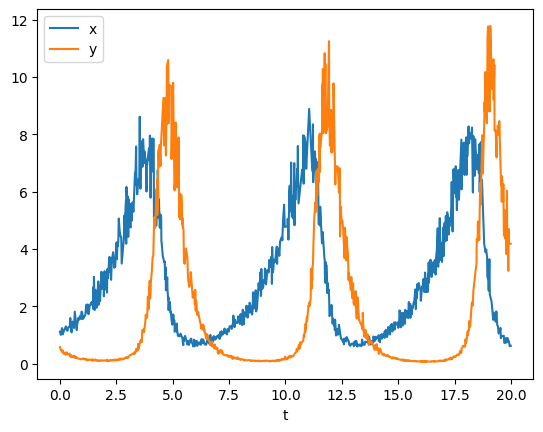

In [154]:
df_filled.plot(x='t', y=['x', 'y'])

In [ ]:
class Net(nn.Module):
    '''Model to regress 2d time series values given scalar input.'''
    def __init__(self):
        super(Net, self).__init__()
        #TODO

    def forward(self, x):
        #TODO

In [247]:
class TimeSeriesDataset(torch.utils.data.Dataset):

    def __init__(self, csv_file):
        self.df = pd.read_csv(csv_file).replace('-', np.NaN).astype(float)
        self.df_filled = self.df.interpolate(limit_direction='both')
        self.X = torch.tensor(df_filled[['t']].values)
        self.y = torch.tensor(df_filled[['x', 'y']].values)
        self.seq_l = 7

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        if idx >= self.seq_l:
            i_start = idx - self.seq_l
            X = self.X[i_start:idx]
        else:
            padding = self.X[0].repeat(self.seq_l - idx)
            X = self.X[0:idx]
            X = torch.cat((padding, X), 0)

        return X, self.y[idx]

In [248]:
train = TimeSeriesDataset('data.csv')
X, y = train[7]
X, y

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600]], dtype=torch.float64),
 tensor([1.0745, 0.4660], dtype=torch.float64))

In [237]:
df_filled.tail(8)

,t,x,y
1992,19.92,0.713049,4.186361
1993,19.93,0.679806,4.186361
1994,19.94,0.607944,4.186361
1995,19.95,0.611707,4.186361
1996,19.96,0.615469,4.186361
1997,19.97,0.619231,4.186361
1998,19.98,0.622993,4.186361
1999,19.99,0.622504,4.186361


In [250]:
trainloader = torch.utils.data.DataLoader(train, batch_size=5, shuffle=True)

for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    # print(inputs)
    print(inputs.shape)
    print(labels)
    print(labels.shape)
    break

torch.Size([5, 7, 1])
tensor([[1.3593, 8.7276],
        [0.6922, 2.5297],
        [5.6992, 0.2215],
        [0.9715, 5.4938],
        [2.0096, 7.9359]], dtype=torch.float64)
torch.Size([5, 2])


In [ ]:
dataset = TimeSeriesDataset('data.csv')
trainloader = torch.utils.data.DataLoader(
    dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

def loss_fn(outputs, labels):
  #TODO
optimizer = #TODO what is a good optimizer?

net = Net()

In [ ]:
for epoch in range(300):

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 20 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

In [ ]:
# Plot results to validate training